<a href="https://colab.research.google.com/github/sbal06/Fashion-MNIST/blob/main/FashionMNISTDataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.5 MB/s eta 0:00:00


### **Set Up the Notebook**
### **92% accuracy**

In [25]:

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.optimizers import SGD


### **Import and Prepare the Data**

In [ ]:
(trainImages, trainLabels), (testImages, testLabels) = keras.datasets.fashion_mnist.load_data()

print("Train images shape is " + str(trainImages.shape))
print("Train labels shape is " + str(trainLabels.shape))
print("Test images shape is " + str(testImages.shape))
print("Test labels shape is " + str(testLabels.shape))

classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boots']

# convert training and testing to one-hot encoded values (helps transfer categorical to numerical values)
trainLabels = to_categorical(trainLabels, 10)
testLabels = to_categorical(testLabels, 10)

Train images shape is (60000, 28, 28)
Train labels shape is (60000,)
Test images shape is (10000, 28, 28)
Test labels shape is (10000,)


[Text(0, 0, 'T-shirt/Top'),
 Text(1, 0, 'Trouser'),
 Text(2, 0, 'Pullover'),
 Text(3, 0, 'Dress'),
 Text(4, 0, 'Coat'),
 Text(5, 0, 'Sandals'),
 Text(6, 0, 'Shirt'),
 Text(7, 0, 'Sneaker'),
 Text(8, 0, 'Bag'),
 Text(9, 0, 'Ankle Boots')]

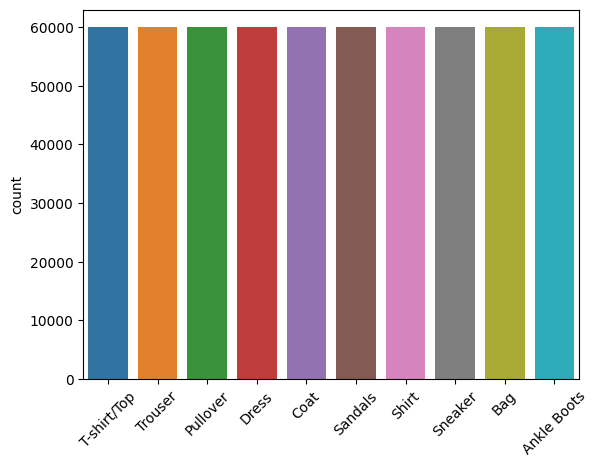

In [ ]:
y = sns.countplot(trainLabels)
y.set_xticklabels(classes, rotation = 45)

In [ ]:
pool_size = 2
model = keras.Sequential([
Conv2D(32, (3, 3), input_shape = (28, 28, 1), padding = 'same', activation = 'relu'),
BatchNormalization(),
MaxPooling2D(pool_size = pool_size),
Dropout(0.1),
Conv2D(64, (3,3), padding = 'same', activation = 'relu', use_bias = False),
MaxPooling2D(pool_size = pool_size),
Dropout(0.2),
Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
BatchNormalization(), # recently added
MaxPooling2D(pool_size = pool_size),
Dropout(0.25),
# Conv2D(128, (3,3), padding = 'same', activation = 'relu', use_bias = False), # recently added
# MaxPooling2D(pool_size = pool_size),
# Dropout(0.25), # recently added
# Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
# BatchNormalization(), # recently added
# MaxPooling2D(pool_size = pool_size),
# Dropout(0.25), # recently added
Flatten(),
Dense(512, activation = 'relu'),
BatchNormalization(),
Dense(10, activation = 'softmax', use_bias = False),

])

In [26]:

batch_size = 128
epochs = 10
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(trainImages, trainLabels, batch_size = batch_size, epochs = epochs, validation_split = (0.1), shuffle = True)
_, score = model.evaluate(testImages, testLabels, verbose = 1)
print(score)



Epoch 1/10
422/422 [==============================] - 157s 357ms/step - loss: 0.1814 - accuracy: 0.9314 - val_loss: 0.2225 - val_accuracy: 0.9222
Epoch 2/10
422/422 [==============================] - 139s 329ms/step - loss: 0.1659 - accuracy: 0.9366 - val_loss: 0.2158 - val_accuracy: 0.9223
Epoch 3/10
422/422 [==============================] - 136s 321ms/step - loss: 0.1586 - accuracy: 0.9403 - val_loss: 0.2293 - val_accuracy: 0.9203
Epoch 4/10
422/422 [==============================] - 143s 339ms/step - loss: 0.1503 - accuracy: 0.9436 - val_loss: 0.2123 - val_accuracy: 0.9308
Epoch 5/10
422/422 [==============================] - 147s 349ms/step - loss: 0.1419 - accuracy: 0.9459 - val_loss: 0.2219 - val_accuracy: 0.9212
Epoch 6/10
422/422 [==============================] - 141s 335ms/step - loss: 0.1373 - accuracy: 0.9480 - val_loss: 0.2006 - val_accuracy: 0.9345
Epoch 7/10
422/422 [==============================] - 143s 340ms/step - loss: 0.1338 - accuracy: 0.9486 - val_loss: 0.2793 -

### **Training and Testing Loss Graph**

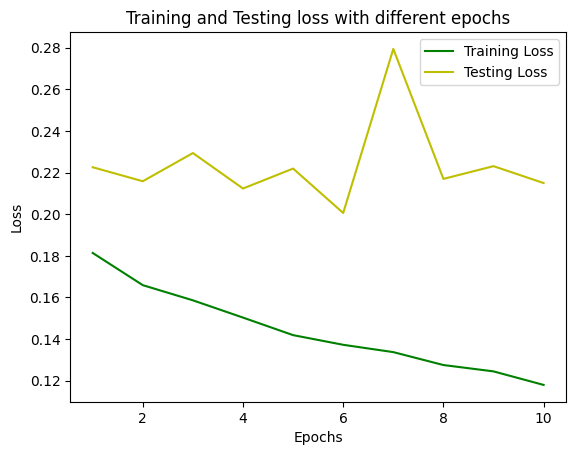

In [27]:

training_loss = history.history['loss']
testing_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, color = 'g', label = 'Training Loss')
plt.plot(epoch_count, testing_loss, color = 'y', label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")
plt.title("Training and Testing loss with different epochs")
plt.show()


### **Training and Testing Accuracy Graph**

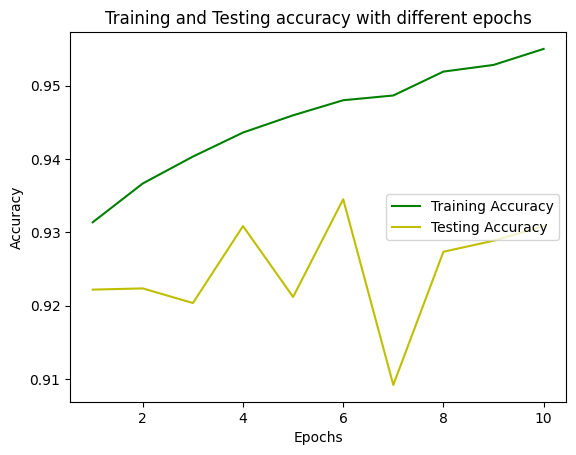

In [28]:
# Training and Validation Accuracy Graph
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count, training_accuracy, color = 'g', label = 'Training Accuracy')
plt.plot(epoch_count, testing_accuracy, color = 'y', label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "center right")
plt.title("Training and Testing accuracy with different epochs")
plt.show()

### **Confusion Matrix**

313/313 [==============================] - 7s 21ms/step


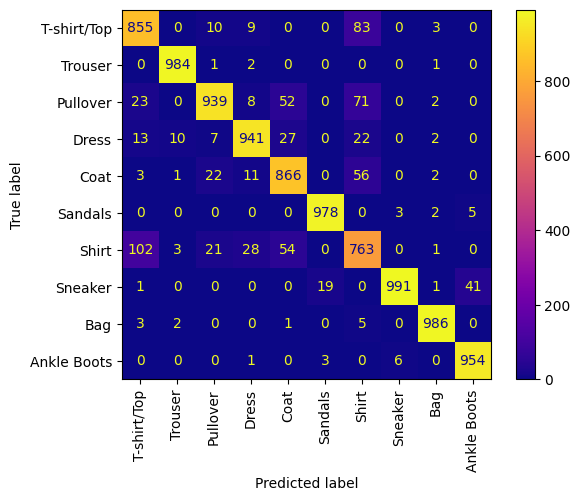

In [29]:

y_pred = model.predict(testImages)
# the problem that is happening here is that y_pred is not one-hot-encoded, since it is a categorical variable.
# confusion_matrix = confusion_matrix(y_true = testLabels, y_pred = y_pred)

y_pred_classes = np.argmax(y_pred, axis = 1) # max of each probability in axis = 1 for 10000 test images
y_test_classes = np.argmax(testLabels, axis = 1)
confusion_mtx = confusion_matrix(y_pred_classes, y_test_classes)
display = ConfusionMatrixDisplay(confusion_mtx, display_labels = classes)
display.plot(cmap = 'plasma', xticks_rotation = 'vertical')



